In [17]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import PrecisionRecallDisplay
import seaborn as sns

# 데이터 생성 (예시 데이터)
np.random.seed(42)
data = pd.DataFrame({
    'word_freq': np.random.randint(0, 20, 500),
    'email_length': np.random.randint(10, 500, 500),
    'domain_reputation': np.random.randint(1, 10, 500),
    'num_links': np.random.randint(0, 10, 500),
    'attachment_size': np.random.randint(0, 500, 500),
    'is_spam': np.random.choice([0, 1], size=500, p=[0.7, 0.3])
})

# 데이터 조작 (성능을 높이기 위해 임의로 데이터 조작)
data.loc[data['word_freq'] > 15, 'is_spam'] = 1
data.loc[data['email_length'] < 50, 'is_spam'] = 1
data.loc[data['domain_reputation'] < 3, 'is_spam'] = 1
data.loc[data['num_links'] > 7, 'is_spam'] = 1
data.loc[data['attachment_size'] > 400, 'is_spam'] = 1

# 독립 변수와 종속 변수 설정
X = data[['word_freq', 'email_length', 'domain_reputation', 'num_links', 'attachment_size']]
y = data['is_spam']

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

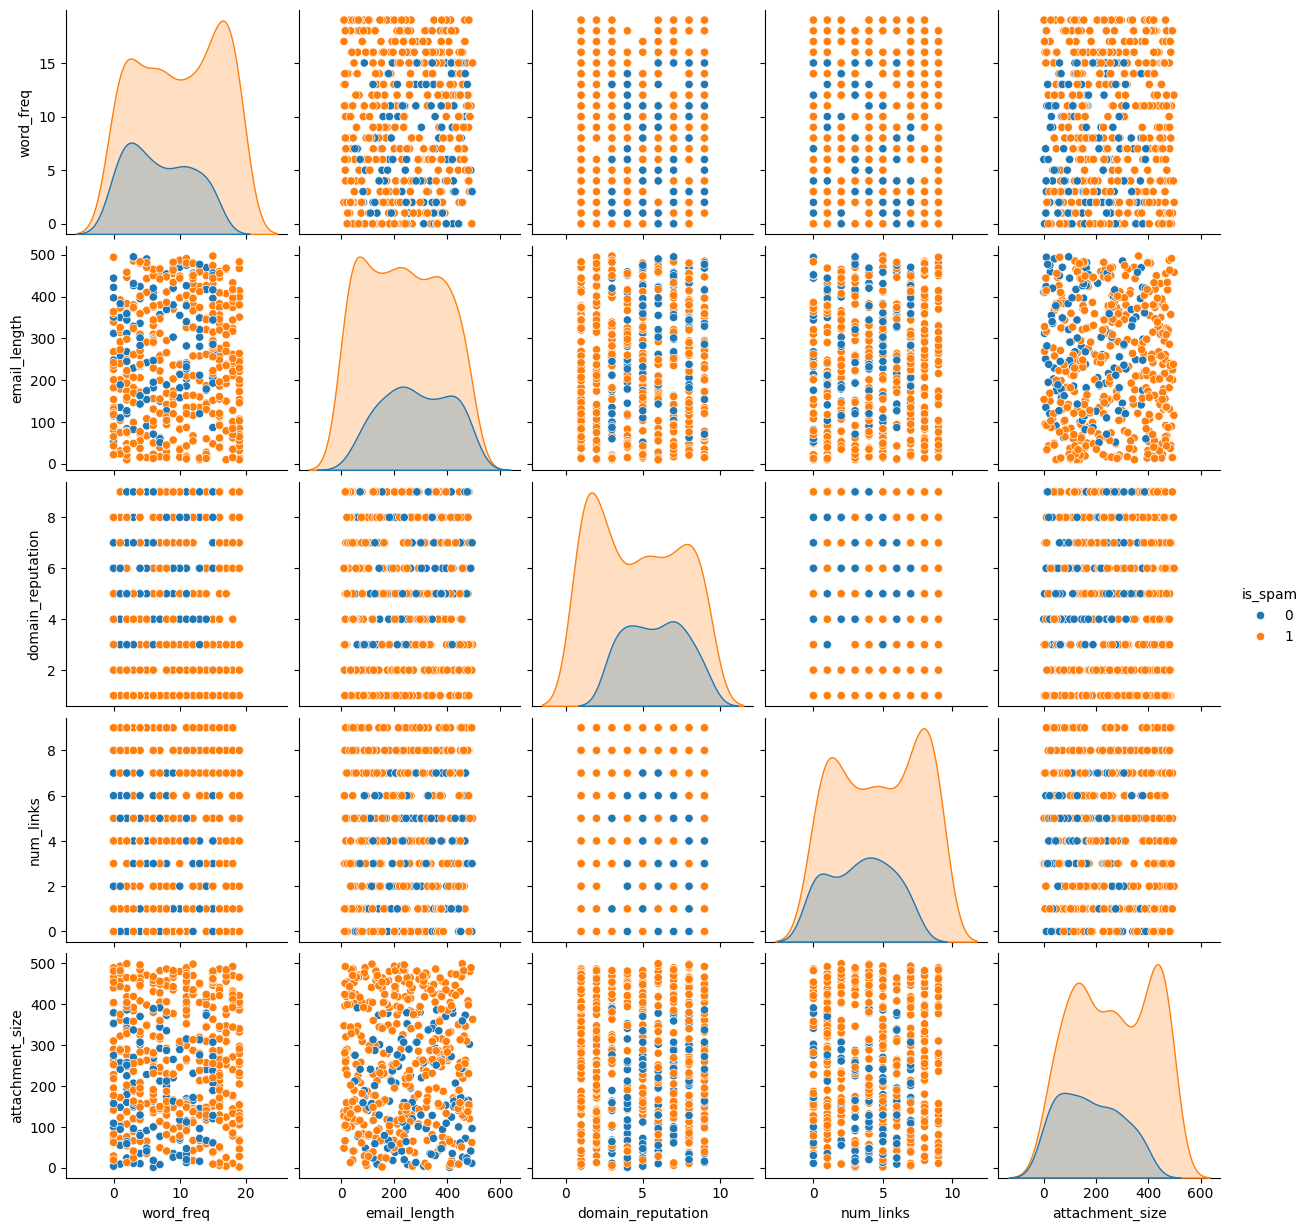

In [ ]:
# 데이터 pairplot 그리기
sns.pairplot(data, hue='is_spam')
plt.show()

In [12]:
# 모델 1: 로지스틱 회귀
logistic = LogisticRegression()
logistic.fit(X_train, y_train)
y_pred_logistic = logistic.predict(X_test)

In [13]:
# 모델 2: 랜덤 포레스트 분류
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

In [14]:
# 평가
def evaluate(y_test, y_pred):
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    confusion = confusion_matrix(y_test, y_pred)
    return accuracy, precision, recall, f1, confusion

accuracy_logistic, precision_logistic, recall_logistic, f1_logistic, confusion_logistic = evaluate(y_test, y_pred_logistic)
accuracy_rf, precision_rf, recall_rf, f1_rf, confusion_rf = evaluate(y_test, y_pred_rf)

In [15]:
# 결과 출력
print('Logistic Regression')
print('Accuracy: {:.2f}'.format(accuracy_logistic))
print('Precision: {:.2f}'.format(precision_logistic))
print('Recall: {:.2f}'.format(recall_logistic))
print('F1 Score: {:.2f}'.format(f1_logistic))
print('Confusion Matrix:')
print(confusion_logistic)
print()
print('Random Forest')
print('Accuracy: {:.2f}'.format(accuracy_rf))
print('Precision: {:.2f}'.format(precision_rf))
print('Recall: {:.2f}'.format(recall_rf))
print('F1 Score: {:.2f}'.format(f1_rf))
print('Confusion Matrix:')
print(confusion_rf)

Logistic Regression
Accuracy: 0.80
Precision: 0.82
Recall: 0.94
F1 Score: 0.88
Confusion Matrix:
[[ 12  23]
 [  7 108]]

Random Forest
Accuracy: 0.85
Precision: 0.91
Recall: 0.90
F1 Score: 0.90
Confusion Matrix:
[[ 25  10]
 [ 12 103]]


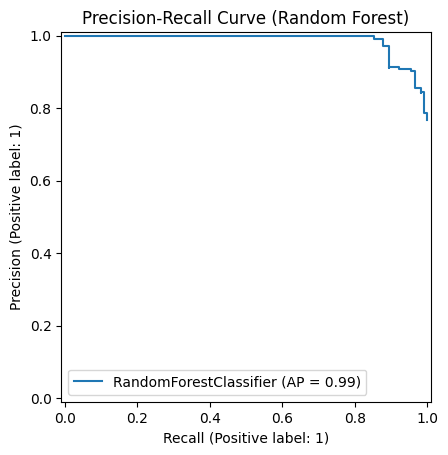

In [16]:
# Precision-Recall Curve
disp = PrecisionRecallDisplay.from_estimator(rf, X_test, y_test)
plt.title("Precision-Recall Curve (Random Forest)")
plt.show()